<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/Categorical_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorical Encoding<br>
This notebook covers a number of encoding algorithms found in the sklearn encoders library

In [1]:
# Clone the entire repo.
!git clone -s https://github.com/cagBRT/Machine-Learning.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 1898, done.
remote: Counting objects: 100% (684/684), done.
remote: Compressing objects: 100% (330/330), done.
remote: Total 1898 (delta 398), reused 600 (delta 354), pack-reused 1214
Receiving objects: 100% (1898/1898), 64.71 MiB | 13.20 MiB/s, done.
Resolving deltas: 100% (1147/1147), done.
/content/cloned-repo


In [2]:
from IPython.display import Image

**Categorical encoding is the process of transforming a categorical column into one (or more) numeric column(s).**

With numbers it’s easy to find relations (such as “bigger”, “smaller”, “double”, “half”).

With strings a computer can say pretty much only whether they are “equal” or “different”.

- **Supervised/Unsupervised**: when the encoding is based solely on the categorical column, then it’s unsupervised. Otherwise, if the encoding is based on some function of the original column and a second (numeric) column, then it’s supervised.<br>
- **Output dimension**: the encoding of a categorical column may produce one numeric column (output dimension = 1) or many numeric columns (output dimension > 1).
<br>
- **Mapping**: if each level has always the same output — whether a scalar (e.g. OrdinalEncoder) or an array (e.g. OneHotEncoder)— then the mapping is unique. On the contrary, if the same level is “allowed” to have different possible outputs, then the mapping is not unique.
<br>

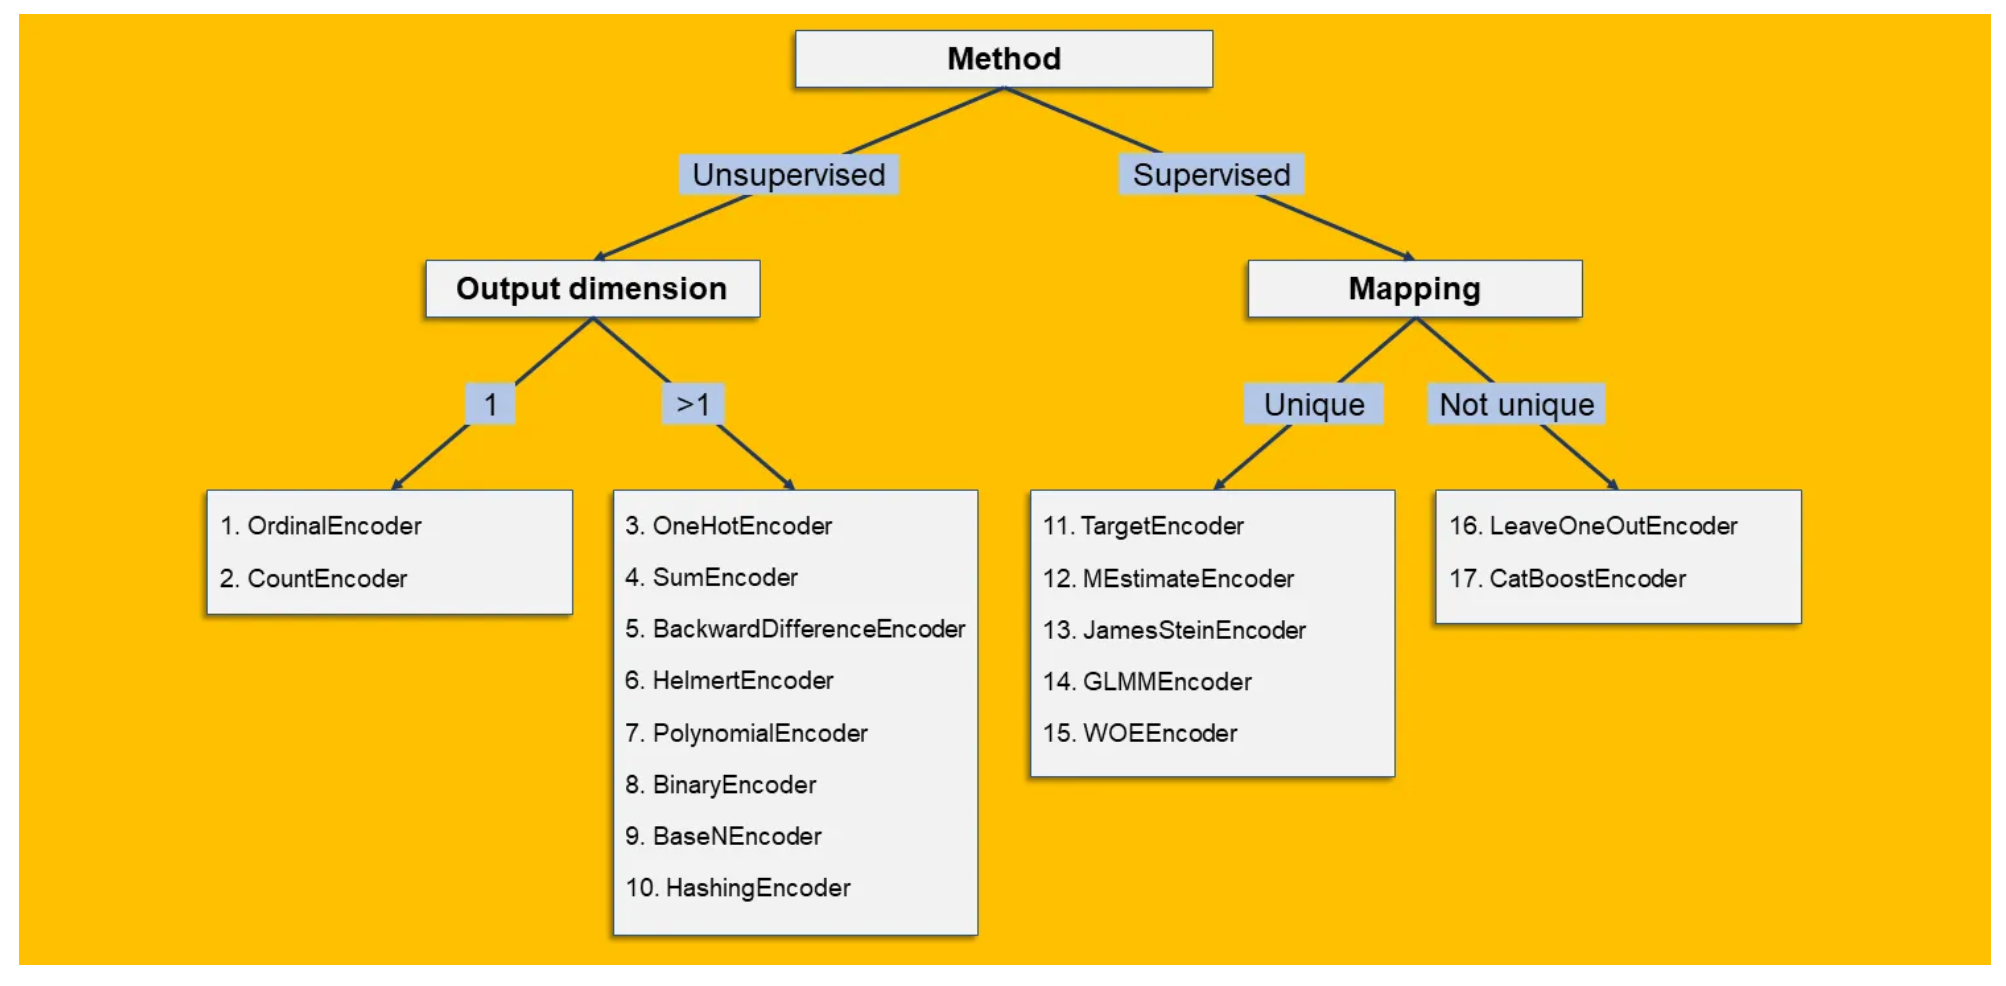

In [3]:
Image("images/oneHot.png")

In [4]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
filename = 'BankChurners.csv'
df = pd.read_csv(filename)
df = df[df.columns[:-2]]
df = df.sample(frac=1.0, random_state=99)
print(df.shape)
df.head()

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,High School,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,Graduate,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,Post-Graduate,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,Graduate,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,College,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718


In [6]:
X= df.drop('Attrition_Flag', axis=1)
y=df["Attrition_Flag"]

In [7]:
X

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,45,F,3,High School,Divorced,$40K - $60K,Silver,36,2,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,41,M,5,Graduate,Married,$60K - $80K,Blue,36,4,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,50,F,3,Post-Graduate,Single,Unknown,Blue,36,5,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,58,F,2,Graduate,Married,Less than $40K,Blue,53,5,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,39,M,3,College,Single,$40K - $60K,Blue,28,6,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,29,F,1,Unknown,Single,Less than $40K,Blue,36,1,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,58,F,0,Graduate,Married,Less than $40K,Blue,47,5,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,30,M,2,Uneducated,Single,$60K - $80K,Blue,13,3,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,49,F,2,High School,Married,Unknown,Blue,36,6,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


In [8]:
y

8873    Existing Customer
5980    Existing Customer
7100    Existing Customer
2092    Existing Customer
1823    Existing Customer
              ...        
7890    Existing Customer
1768    Existing Customer
9929    Existing Customer
3240    Existing Customer
7203    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object



---



---



---



# OrdinalEncoder
Each level is mapped to an integer, from 1 to L (where L is the number of levels).

Ordinal encoding often produces nonsense, especially if the levels have no intrinsic order.

It’s only a representation of convenience, used often to save memory, or as an intermediate step for other types of encoding.

# sklearn OrdinalEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder
ce_ord = ce.OrdinalEncoder(cols = ['Education_Level'])
ce_ord.fit_transform(df)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,1,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,2,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,3,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,2,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,4,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,Existing Customer,29,F,1,6,Single,Less than $40K,Blue,36,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,Existing Customer,58,F,0,2,Married,Less than $40K,Blue,47,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,Existing Customer,30,M,2,5,Single,$60K - $80K,Blue,13,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,Existing Customer,49,F,2,1,Married,Unknown,Blue,36,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000




---



---



# CountEncoder

Each level is mapped to the number of observations of that level.

In [12]:
df = pd.read_csv(filename)
df = df[df.columns[:-2]]
df = df.sample(frac=1.0, random_state=99)
print(df.shape)
df.head()

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,High School,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,Graduate,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,Post-Graduate,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,Graduate,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,College,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718


In [13]:
df.Education_Level = df.Education_Level.replace(df.Education_Level.value_counts().to_dict())

Count encoding can be useful as an indicator of the “credibility” of each level. <br>
For instance, a machine learning algorithm may automatically decide to take into account the information brought by the level only if its count is above some threshold.

In [14]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,2013,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,3128,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,516,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,3128,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,1013,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,Existing Customer,29,F,1,1519,Single,Less than $40K,Blue,36,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,Existing Customer,58,F,0,3128,Married,Less than $40K,Blue,47,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,Existing Customer,30,M,2,1487,Single,$60K - $80K,Blue,13,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,Existing Customer,49,F,2,2013,Married,Unknown,Blue,36,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000




---



---



# OneHotEncoder

The OneHotEncoder is the algorithm for excellence (and the most used).

Each level is mapped to a dummy column (i.e. a column of 0/1), indicating whether that level is carried by that row.

Initially, your input is a single column, after encoding, your output consists of L columns (one for each level of the original column).

**This is why one-hot encoding should be handled with care:** you may end up with a dataframe that is far bigger than the original one.

In [17]:
df = pd.read_csv(filename)
df = df[df.columns[:-2]]
df = df.sample(frac=1.0, random_state=99)
print(df.shape)
df.head()

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,High School,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,Graduate,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,Post-Graduate,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,Graduate,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,College,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

df_encoded = pd.DataFrame (encoder.fit_transform(df[['Education_Level']]))

df_encoded.columns = encoder.get_feature_names_out(['Education_Level'])

df.drop(['Education_Level'] ,axis=1, inplace=True)

df_ed_level_encoded= pd.concat([df, df_encoded ], axis=1)

Scroll to the end of the columns and see the one hot encoding of Education_Level

In [19]:
df_ed_level_encoded

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
8873,716574033,Existing Customer,45,F,3,Divorced,$40K - $60K,Silver,36,2,...,86,0.623,0.102,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5980,709747308,Existing Customer,41,M,5,Married,$60K - $80K,Blue,36,4,...,64,0.561,0.294,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7100,708128733,Existing Customer,50,F,3,Single,Unknown,Blue,36,5,...,99,0.623,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2092,716647983,Existing Customer,58,F,2,Married,Less than $40K,Blue,53,5,...,34,0.062,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1823,713574708,Existing Customer,39,M,3,Single,$40K - $60K,Blue,28,6,...,66,0.784,0.718,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,Existing Customer,29,F,1,Single,Less than $40K,Blue,36,1,...,80,0.778,0.680,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1768,720371733,Existing Customer,58,F,0,Married,Less than $40K,Blue,47,5,...,39,0.345,0.352,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9929,779082633,Existing Customer,30,M,2,Single,$60K - $80K,Blue,13,3,...,104,0.733,0.238,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3240,715179933,Existing Customer,49,F,2,Married,Unknown,Blue,36,6,...,91,0.685,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0




---



---



# SumEncoder

Sum Encoder compares the mean of the dependent variable (target) for a given level of a categorical column to the overall mean of the target.

Sum Encoding is very similar to OHE and both of them are commonly used in Linear Regression (LR) types of models.

If you use Category-Encoders it will look like this code below.

SumEncoder (as the next 3 encoders) belongs to a class called “contrast encodings”. These encodings are designed to have a specific behaviour when used in regression problems. In other words, you use one of these encodings if you want the regression coefficients to have some specific properties.

In particular, SumEncoder is used when you want the regression coefficients to have zero-sum.

**Simple example of SumEncoder**

In [20]:
df2 = pd.DataFrame({
    'color':["a", "b", "c", "d"],
    'outcome':[1, 2,  0, 1]})

In [21]:
df2

,color,outcome
0,a,1
1,b,2
2,c,0
3,d,1


Step1: convert strings to numbers<br>
Step2: convert numbers to SumEncoder

In [22]:
ce_ord=ce.OrdinalEncoder(cols=['color'])
ce_ord.fit_transform(df2,df2.outcome)

ce_sum = ce.SumEncoder(cols = ['color'])
ce_sum.fit_transform(df2,df2.outcome)

/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,color_0,color_1,color_2,outcome
0,1,1.0,0.0,0.0,1
1,1,0.0,1.0,0.0,2
2,1,0.0,0.0,1.0,0
3,1,-1.0,-1.0,-1.0,1




---



**Dataframe example of SumEncoder**

In [23]:
df = pd.read_csv(filename)
df = df[df.columns[:-2]]
df = df.sample(frac=1.0, random_state=99)
print(df.shape)
df.head(20)

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,High School,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,Graduate,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,Post-Graduate,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,Graduate,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,College,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
5632,822132858,Attrited Customer,41,M,4,Uneducated,Married,$80K - $120K,Blue,37,...,2,2,23250.0,0,23250.0,0.564,2205,43,0.654,0.000
2321,721055058,Existing Customer,36,M,2,Uneducated,Married,$60K - $80K,Blue,21,...,1,5,12763.0,2517,10246.0,1.631,2599,46,0.917,0.197
7765,719112258,Existing Customer,42,M,4,College,Unknown,$60K - $80K,Blue,35,...,3,3,2516.0,1360,1156.0,1.193,4692,79,0.681,0.541
3219,795991758,Existing Customer,47,F,3,Unknown,Married,$40K - $60K,Blue,41,...,3,3,7553.0,660,6893.0,0.549,4079,67,0.457,0.087
1834,779951058,Existing Customer,54,F,3,High School,Married,Unknown,Blue,38,...,2,4,5122.0,1642,3480.0,0.935,1908,39,0.696,0.321


**SumEncode the categorical data**

In [24]:
ce_sum = ce.SumEncoder(cols = ['Education_Level'])
df_se= ce_sum.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


In [25]:
df_se.head(20)

,intercept,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level_0,Education_Level_1,Education_Level_2,Education_Level_3,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,1,716574033,Existing Customer,45,F,3,1.0,0.0,0.0,0.0,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,1,709747308,Existing Customer,41,M,5,0.0,1.0,0.0,0.0,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,1,708128733,Existing Customer,50,F,3,0.0,0.0,1.0,0.0,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,1,716647983,Existing Customer,58,F,2,0.0,1.0,0.0,0.0,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,1,713574708,Existing Customer,39,M,3,0.0,0.0,0.0,1.0,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
5632,1,822132858,Attrited Customer,41,M,4,0.0,0.0,0.0,0.0,...,2,2,23250.0,0,23250.0,0.564,2205,43,0.654,0.000
2321,1,721055058,Existing Customer,36,M,2,0.0,0.0,0.0,0.0,...,1,5,12763.0,2517,10246.0,1.631,2599,46,0.917,0.197
7765,1,719112258,Existing Customer,42,M,4,0.0,0.0,0.0,1.0,...,3,3,2516.0,1360,1156.0,1.193,4692,79,0.681,0.541
3219,1,795991758,Existing Customer,47,F,3,0.0,0.0,0.0,0.0,...,3,3,7553.0,660,6893.0,0.549,4079,67,0.457,0.087
1834,1,779951058,Existing Customer,54,F,3,1.0,0.0,0.0,0.0,...,2,4,5122.0,1642,3480.0,0.935,1908,39,0.696,0.321


# BackwardDifferenceEncoder

This encoder is useful for ordinal variables, i.e. variables whose levels can be ordered in a meaningful way. BackwardDifferenceEncoder is designed to compare adjacent levels.

Suppose you have an ordinable variable (e.g. education level) and you want to know how it is related to a numeric variable (e.g. income). It may be interesting to compare each couple of consecutive levels (e.g. bachelors vs. high-school, masters vs. bachelors) with respect to the target variable. This is what BackwardDifferenceEncoder is designed for.



---



**Simple Example**

In [26]:
df2 = pd.DataFrame({
    'color':["a", "b", "c", "d"],
    'outcome':[1, 2,  0, 1]})
df2

,color,outcome
0,a,1
1,b,2
2,c,0
3,d,1


In [27]:
X2 = df2.drop('outcome', axis = 1)
y2 = df2.drop('color', axis = 1)

In [28]:
ce_backward = ce.BackwardDifferenceEncoder(cols = ['color'])
ce_backward.fit_transform(X2, y2)

/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,color_0,color_1,color_2
0,1,-0.75,-0.5,-0.25
1,1,0.25,-0.5,-0.25
2,1,0.25,0.5,-0.25
3,1,0.25,0.5,0.75




---



In [29]:
ce_backward = ce.BackwardDifferenceEncoder(cols = ['Education_Level'])
ce_backward.fit_transform(X,y)

/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level_0,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,1,716574033,45,F,3,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,1,709747308,41,M,5,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,1,708128733,50,F,3,0.142857,0.285714,-0.571429,-0.428571,-0.285714,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,1,716647983,58,F,2,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,1,713574708,39,M,3,0.142857,0.285714,0.428571,-0.428571,-0.285714,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,1,711263058,29,F,1,0.142857,0.285714,0.428571,0.571429,0.714286,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,1,720371733,58,F,0,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,1,779082633,30,M,2,0.142857,0.285714,0.428571,0.571429,-0.285714,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,1,715179933,49,F,2,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


# Helmert
HelmertEncoder is very similar to BackwardDifferenceEncoder, but instead of being compared just to the previous one, each level is compared with all the previous levels.



In [30]:
ce_helmert = ce.HelmertEncoder(cols = ['Education_Level'])
ce_helmert.fit_transform(X,y)

/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level_0,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,1,716574033,45,F,3,-1.0,-1.0,-1.0,-1.0,-1.0,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,1,709747308,41,M,5,1.0,-1.0,-1.0,-1.0,-1.0,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,1,708128733,50,F,3,0.0,2.0,-1.0,-1.0,-1.0,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,1,716647983,58,F,2,1.0,-1.0,-1.0,-1.0,-1.0,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,1,713574708,39,M,3,0.0,0.0,3.0,-1.0,-1.0,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,1,711263058,29,F,1,0.0,0.0,0.0,0.0,5.0,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,1,720371733,58,F,0,1.0,-1.0,-1.0,-1.0,-1.0,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,1,779082633,30,M,2,0.0,0.0,0.0,4.0,-1.0,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,1,715179933,49,F,2,-1.0,-1.0,-1.0,-1.0,-1.0,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


# Polynomial Encoder

PolynomialEncoder is designed to quantify linear, quadratic and cubic behaviors of the target variable with respect to the categorical variable.

How can a numeric variable have a linear (or quadratic, or cubic) relation with a variable that is not numeric? <br>

This is based on the assumption that the underlying categorical variable has levels that are not only ordinable, but also equally spaced.

**For this reason, use it with care, only when you are sure that the assumption is reasonable.**

In [31]:
ce_poly = ce.PolynomialEncoder(cols = ['Education_Level'])
ce_poly.fit_transform(X,y)

/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level_0,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,1,716574033,45,F,3,-5.669467e-01,5.455447e-01,-4.082483e-01,0.241747,-1.091089e-01,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,1,709747308,41,M,5,-3.779645e-01,9.521795e-17,4.082483e-01,-0.564076,4.364358e-01,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,1,708128733,50,F,3,-1.889822e-01,-3.273268e-01,4.082483e-01,0.080582,-5.455447e-01,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,1,716647983,58,F,2,-3.779645e-01,9.521795e-17,4.082483e-01,-0.564076,4.364358e-01,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,1,713574708,39,M,3,1.617449e-17,-4.364358e-01,-1.969262e-16,0.483494,-5.193771e-16,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,1,711263058,29,F,1,3.779645e-01,-4.355993e-17,-4.082483e-01,-0.564076,-4.364358e-01,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,1,720371733,58,F,0,-3.779645e-01,9.521795e-17,4.082483e-01,-0.564076,4.364358e-01,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,1,779082633,30,M,2,1.889822e-01,-3.273268e-01,-4.082483e-01,0.080582,5.455447e-01,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,1,715179933,49,F,2,-5.669467e-01,5.455447e-01,-4.082483e-01,0.241747,-1.091089e-01,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


# BinaryEncoder

BinaryEncoder is basically the same of OrdinalEncoder, the only difference is that the integers are converted to binary numbers, then every positional digit is encoded.

**Simple Example**

In [32]:
df2 = pd.DataFrame({
    'color':["a", "b", "c", "d","e"],
    'outcome':[1, 2,  0, 1,0]})
df2

,color,outcome
0,a,1
1,b,2
2,c,0
3,d,1
4,e,0


In [33]:
bin_color=ce.BinaryEncoder(cols=['color'])
bin_color.fit_transform(df2.color,df2.outcome)

,color_0,color_1,color_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1


In [34]:
ce_bin = ce.BinaryEncoder(cols = ['Education_Level'])
ce_bin.fit_transform(X, y)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level_0,Education_Level_1,Education_Level_2,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,45,F,3,0,0,1,Divorced,$40K - $60K,Silver,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,41,M,5,0,1,0,Married,$60K - $80K,Blue,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,50,F,3,0,1,1,Single,Unknown,Blue,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,58,F,2,0,1,0,Married,Less than $40K,Blue,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,39,M,3,1,0,0,Single,$40K - $60K,Blue,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,29,F,1,1,1,0,Single,Less than $40K,Blue,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,58,F,0,0,1,0,Married,Less than $40K,Blue,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,30,M,2,1,0,1,Single,$60K - $80K,Blue,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,49,F,2,0,0,1,Married,Unknown,Blue,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


# BaseNEncoder

BaseNEncoder is simply a generalization of the BinaryEncoder. <br>

In fact, in BinaryEncoder, the numbers are in base 2, whereas in BaseNEncoder, numbers are in base n, with n greater than 1.

Base-N encoder encodes the categories into arrays of their base-N representation. A base of 1 is equivalent to one-hot encoding (not really base-1, but useful), a base of 2 is equivalent to binary encoding. N=number of actual categories is equivalent to vanilla ordinal encoding.


This method is only relevant if this estimator is used as a sub-estimator of a meta-estimator, e.g. used inside a Pipeline. Otherwise it has no effect.



**Simple Example**

In [35]:
df2 = pd.DataFrame({
    'color':["a", "b", "c", "d","e"],
    'outcome':[1, 2,  0, 1, 0]})
df2

,color,outcome
0,a,1
1,b,2
2,c,0
3,d,1
4,e,0


In [36]:
ce_basen = ce.BaseNEncoder(cols = ['color'])
ce_basen.fit_transform(df2.color,df2.outcome)

,color_0,color_1,color_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1




---



---



In [37]:
ce_basen = ce.BaseNEncoder(cols = ['Education_Level'])
ce_basen.fit_transform(X, y)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level_0,Education_Level_1,Education_Level_2,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,45,F,3,0,0,1,Divorced,$40K - $60K,Silver,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,41,M,5,0,1,0,Married,$60K - $80K,Blue,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,50,F,3,0,1,1,Single,Unknown,Blue,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,58,F,2,0,1,0,Married,Less than $40K,Blue,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,39,M,3,1,0,0,Single,$40K - $60K,Blue,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,29,F,1,1,1,0,Single,Less than $40K,Blue,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,58,F,0,0,1,0,Married,Less than $40K,Blue,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,30,M,2,1,0,1,Single,$60K - $80K,Blue,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,49,F,2,0,0,1,Married,Unknown,Blue,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


# HashingEncoder

A multivariate hashing implementation with configurable dimensionality/precision.

The advantage of this encoder is that it does not maintain a dictionary of observed categories. Consequently, the encoder does not grow in size and accepts new values during data scoring by design.

It’s important to read about how max_process & max_sample work before setting them manually, inappropriate setting slows down encoding.

Default value of ‘max_process’ is 1 on Windows because multiprocessing might cause issues, see in : https://github.com/scikit-learn-contrib/categorical-encoding/issues/215 https://docs.python.org/2/library/multiprocessing.html?highlight=process#windows

**Hashing** is the process of transforming any given key or a string of characters into another value. This is usually represented by a shorter, fixed-length value or key that represents and makes it easier to find or employ the original string. The most popular use for hashing is the implementation of hash tables.

**Simple Example**

In [38]:
df2 = pd.DataFrame({
    'color':["a", "b", "c", "d","e"],
    'outcome':[1, 2,  0, 1, 0]})
df2

,color,outcome
0,a,1
1,b,2
2,c,0
3,d,1
4,e,0


In [39]:
ce_hash = ce.HashingEncoder(cols = ['color'])
ce_hash.fit_transform(df2.color,df2.outcome)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0




---



---



In [40]:
ce_hash = ce.HashingEncoder(cols = ['Education_Level'])
ce_hash.fit_transform(X, y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,CLIENTNUM,Customer_Age,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,0,0,0,0,0,1,0,0,716574033,45,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,0,0,1,0,0,0,0,0,709747308,41,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,0,0,0,0,1,0,0,0,708128733,50,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,0,0,1,0,0,0,0,0,716647983,58,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,0,0,1,0,0,0,0,0,713574708,39,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,0,0,0,0,0,0,1,0,711263058,29,...,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,0,0,1,0,0,0,0,0,720371733,58,...,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,0,0,0,0,0,1,0,0,779082633,30,...,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,0,0,0,0,0,1,0,0,715179933,49,...,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


The fundamental property of hashing is that the resulting integer is uniformly distributed. So, if you take a divisor big enough, it’s unlikely that two different strings are mapped to the same integer. Why would that be useful? Actually, this has a very practical application called “hashing trick”.

Imagine that you want to make an email spam classifier using a logistic regression. You could do that by one-hot-encoding all the words contained in your dataset. The main downsides are that you would need to store the mapping in a separate dictionary and your model dimensions would change any time that new strings appear.

These issues may be easily overcome by using the hashing trick, because by hashing the input, you don’t need a dictionary anymore and your output dimension is fixed (it depends only on the divisor that you choose initially). Moreover, for the properties of hashing, you are granted that a new string will likely have a different encoding than the existing ones.



# TargetEncoder

This method is only relevant if this estimator is used as a sub-estimator of a meta-estimator, e.g. used inside a Pipeline. Otherwise it has no effect.

Some encoders behave differently on whether y is given or not. This is mainly due to regularisation in order to avoid overfitting.

**On training data transform should be called with y**,<br>
**On test data without**.

In TargetEncoder, the weight depends on the group numerosity and on a parameter called “smoothing”. When smoothing is 0, we rely solely on group means. Then, as smoothing increases, the global mean weights more and more, leading to a stronger regularization.



**Simple Example**

In [41]:
df2 = pd.DataFrame({
    'color':["a", "b", "c", "d","e"],
    'outcome':[1, 2,  0, 1, 0]})
df2

,color,outcome
0,a,1
1,b,2
2,c,0
3,d,1
4,e,0


In [42]:
# Target with default parameters
ce_target = ce.TargetEncoder(cols = ['color'])

ce_target.fit(df2.color, df2.outcome)
# Must pass the series for y in v1.2.8

ce_target.transform(df2.color, df2.outcome)

,color
0,0.826022
1,0.956130
2,0.695913
3,0.826022
4,0.695913


In [43]:
df = pd.read_csv(filename)
df = df[df.columns[:-2]]
df = df.sample(frac=1.0, random_state=99)
print(df.shape)
df.head()


(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,Existing Customer,45,F,3,High School,Divorced,$40K - $60K,Silver,36,...,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,Existing Customer,41,M,5,Graduate,Married,$60K - $80K,Blue,36,...,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,Existing Customer,50,F,3,Post-Graduate,Single,Unknown,Blue,36,...,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,Existing Customer,58,F,2,Graduate,Married,Less than $40K,Blue,53,...,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,Existing Customer,39,M,3,College,Single,$40K - $60K,Blue,28,...,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718


In [47]:
df['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],
                        [0,1], inplace=True)
X= df.drop('Attrition_Flag', axis=1)
y=df["Attrition_Flag"]

In [48]:
ce_target = ce.TargetEncoder(cols = ['Education_Level'])
ce_target.fit(X, y)
ce_target.transform(X, y)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,45,F,3,0.152012,Divorced,$40K - $60K,Silver,36,2,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,41,M,5,0.155691,Married,$60K - $80K,Blue,36,4,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,50,F,3,0.178295,Single,Unknown,Blue,36,5,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,58,F,2,0.155691,Married,Less than $40K,Blue,53,5,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,39,M,3,0.152024,Single,$40K - $60K,Blue,28,6,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,29,F,1,0.168532,Single,Less than $40K,Blue,36,1,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,58,F,0,0.155691,Married,Less than $40K,Blue,47,5,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,30,M,2,0.159381,Single,$60K - $80K,Blue,13,3,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,49,F,2,0.152012,Married,Unknown,Blue,36,6,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000




---



---



# LeaveOneOut

All the encoders seen up until now have a unique mapping.

However, if you plan to use the encoding as input for a predictive model (for example a gradient boosting), this could be a problem. In fact, suppose that you use TargetEncoder. This would imply that you are introducing information about y_train inside X_train, which could lead to a serious risk of overfitting.

The point is: how to maintain a supervised encoding, while limiting the risk of overfitting? LeaveOneOutEncoder offers a brilliant solution. It does a vanilla target encoding but, for each row, it does not consider the value of y observed for that row. In this way, it avoids row-wise leakage.



In [49]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['Education_Level'])
ce_leave.fit(X,y)
ce_leave.transform(X,y)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,45,F,3,0.152087,Divorced,$40K - $60K,Silver,36,2,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,41,M,5,0.155740,Married,$60K - $80K,Blue,36,4,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,50,F,3,0.178641,Single,Unknown,Blue,36,5,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,58,F,2,0.155740,Married,Less than $40K,Blue,53,5,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,39,M,3,0.152174,Single,$40K - $60K,Blue,28,6,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,29,F,1,0.168643,Single,Less than $40K,Blue,36,1,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,58,F,0,0.155740,Married,Less than $40K,Blue,47,5,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,30,M,2,0.159489,Single,$60K - $80K,Blue,13,3,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,49,F,2,0.152087,Married,Unknown,Blue,36,6,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000


# CatBoostEncoder

This method is only relevant if this estimator is used as a sub-estimator of a meta-estimator, e.g. used inside a Pipeline. Otherwise it has no effect.

Catboost is a recently created target-based categorical encoder.

It is intended to overcome target leakage problems inherent in LOO.

CatBoost is a gradient-boosting method known for how well it works with categorical variables. Its great performance and increased accuracy in machine learning models have made it a favorite in many areas.



CatBoost Encoding for categorical features.

Supported targets: binomial and continuous. For polynomial target support, see PolynomialWrapper.

CatBoostEncoder is the variation of target encoding. It supports time-aware encoding, regularization, and online learning.

This implementation is time-aware (similar to CatBoost’s parameter ‘has_time=True’), so no random permutations are used. It makes this encoder sensitive to ordering of the data and suitable for time series problems. If your data does not have time dependency, it should still work just fine, assuming sorting of the data won’t leak any information outside the training scope (i.e., no data leakage). When data leakage is a possibility, it is wise to eliminate it first (for example, shuffle or resample the data).

In [50]:
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()

# Fit encoder and transform the features
train_cbe = cbe_encoder.fit_transform(X,y)

In [51]:
train_cbe

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8873,716574033,45,0.160660,3,0.160660,0.160660,0.160660,0.160660,36,2,2,2,18000.0,1829,16171.0,0.675,7149,86,0.623,0.102
5980,709747308,41,0.160660,5,0.160660,0.160660,0.160660,0.160660,36,4,4,3,4575.0,1344,3231.0,0.460,4726,64,0.561,0.294
7100,708128733,50,0.080330,3,0.160660,0.160660,0.160660,0.080330,36,5,4,3,1814.0,0,1814.0,0.852,5014,99,0.623,0.000
2092,716647983,58,0.053553,2,0.080330,0.080330,0.160660,0.053553,53,5,3,1,7712.0,962,6750.0,0.418,1574,34,0.062,0.125
1823,713574708,39,0.080330,3,0.160660,0.080330,0.080330,0.040165,28,6,2,2,1640.0,1177,463.0,0.695,3124,66,0.784,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,711263058,29,0.173513,1,0.168638,0.169498,0.171723,0.160959,36,1,1,2,2763.0,1879,884.0,0.701,4660,80,0.778,0.680
1768,720371733,58,0.173480,0,0.155742,0.151155,0.171674,0.160941,47,5,3,2,2232.0,786,1446.0,0.435,1395,39,0.345,0.352
9929,779082633,30,0.146186,2,0.158924,0.169455,0.134922,0.160924,13,3,2,3,4107.0,979,3128.0,0.647,14596,104,0.733,0.238
3240,715179933,49,0.173448,2,0.152092,0.151123,0.168310,0.160907,36,6,2,3,15704.0,0,15704.0,0.924,4253,91,0.685,0.000
